The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: xlabel='date'>

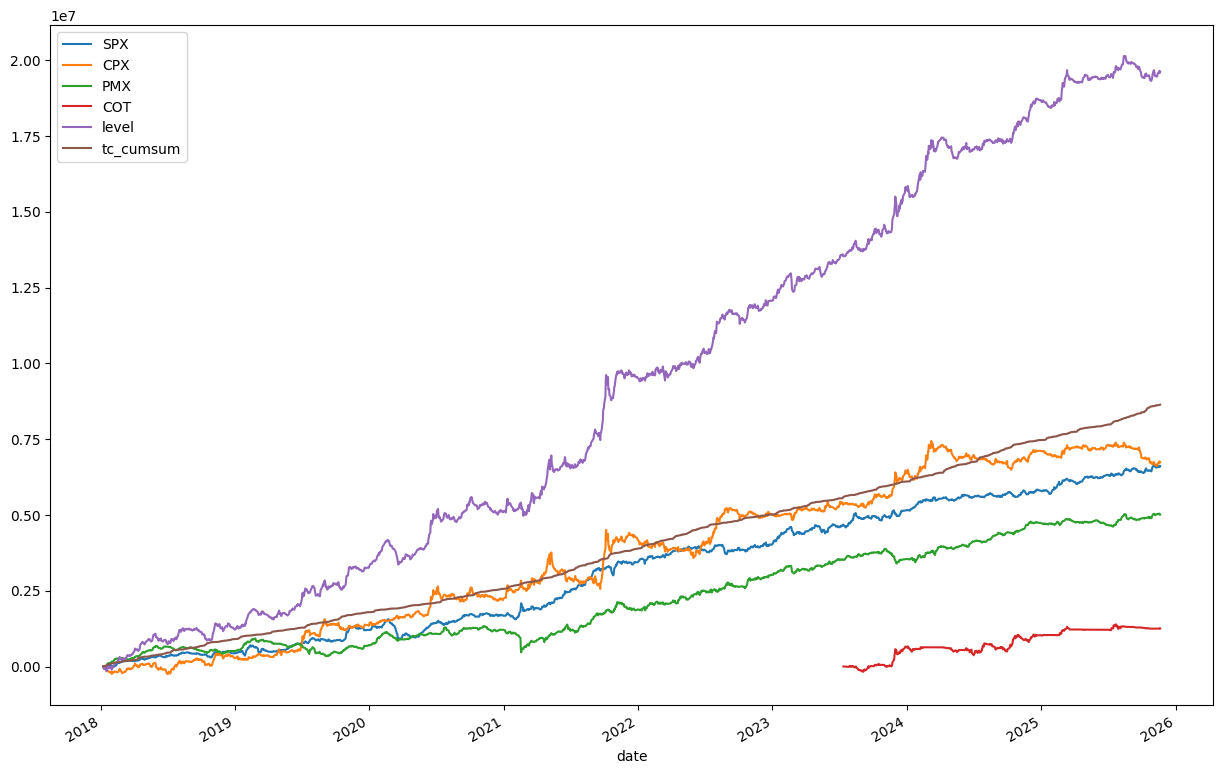

In [3]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import pandas as pd
parent_dir = "C:/Users/yuhang.hou/projects/transfer-david"
sys.path.append(parent_dir)
from utils import *

df1 = load_and_process('p4tc_q') 
df2 = load_and_process('p4tc_m')
df3 = load_and_process('c5tc_m_kf')

df4 = load_and_process('s10tc_m') 
df5 = load_and_process('s10tc_q') 
df6 = (load_and_process('c5tc_q_kf1') 
        + load_and_process('c5tc_q_kf2') 
    )
df7 = (load_and_process('c5tc_m_cot') 
        +load_and_process('p4tc_m_cot')
    )

df_plot = pd.DataFrame()

df_plot['Pmx_Q'] = df1['level']
df_plot['Pmx_M'] = df2['level']
df_plot['Cpx_M'] = df3['level']
df_plot['Spx_M'] = df4['level']
df_plot['Spx_Q'] = df5['level']
df_plot['Cpx_Q'] = df6['level'] 
df_plot['level'] = df1['level'] + df2['level'] + df3['level']+df4['level']+df5['level']+df6['level']
df_plot['SPX'] = df4['level']+df5['level']
df_plot['CPX'] = df3['level']+df6['level']
df_plot['PMX'] = df1['level']+df2['level']
df_plot['COT']= df7['level']
df_plot['level']=df_plot['level'].add(df7['level'], fill_value=0)
df_plot['tc_cumsum'] = df1['tc_cumsum']+df2['tc_cumsum']+df3['tc_cumsum']+df4['tc_cumsum']+df5['tc_cumsum']+df6['tc_cumsum']
df_plot['tc_cumsum']=df_plot['tc_cumsum'].add(df7['tc_cumsum'], fill_value=0)
df_plot[['SPX','CPX','PMX','COT','level','tc_cumsum']].plot( figsize=(15,10))

c:\Users\yuhang.hou\projects\transfer-david\backtest\utils.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


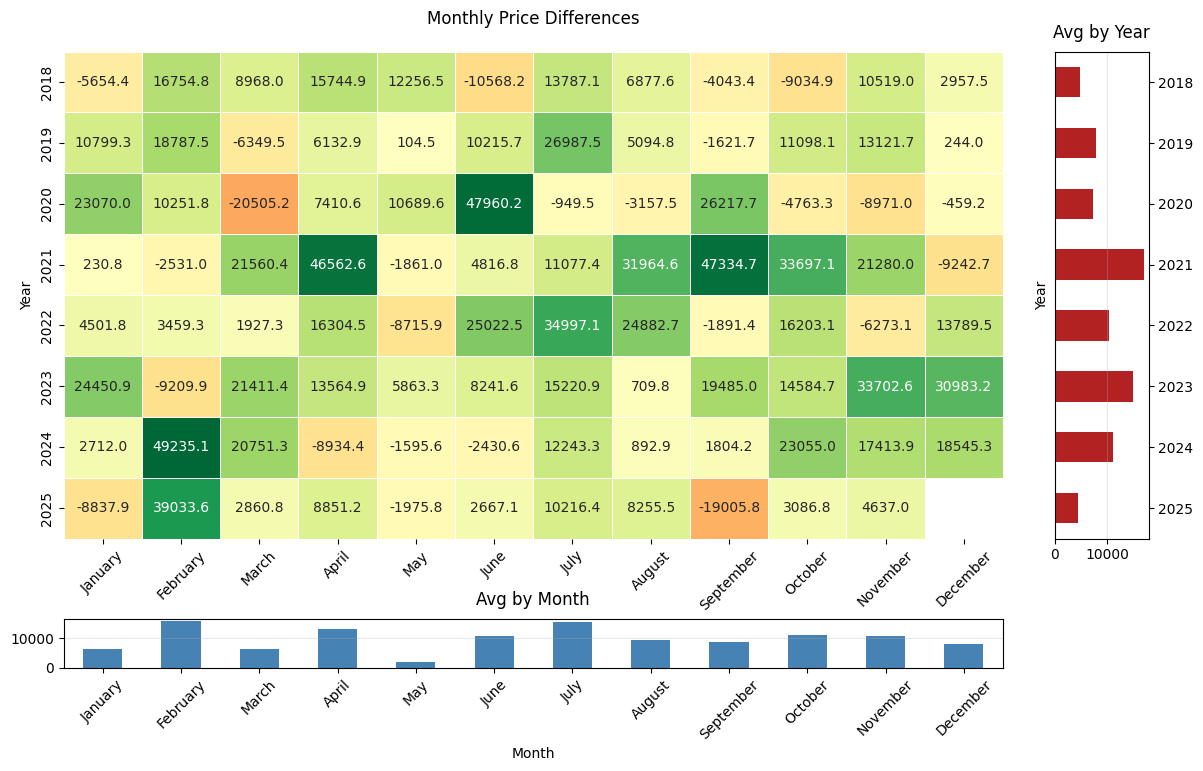

In [5]:
monthly_pnl_attribution(df_plot['level'])

c:\Users\yuhang.hou\projects\transfer-david\backtest\utils.py:286: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  drawdown_start = (in_drawdown & ~in_drawdown.shift(1).fillna(False)).infer_objects(copy=False)
c:\Users\yuhang.hou\projects\transfer-david\backtest\utils.py:287: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  drawdown_end = (in_drawdown & ~in_drawdown.shift(-1).fillna(False)).infer_objects(copy=False)
c:\Users\yuhang.hou\projects\transfer-david\backtest\utils.py:286: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is d

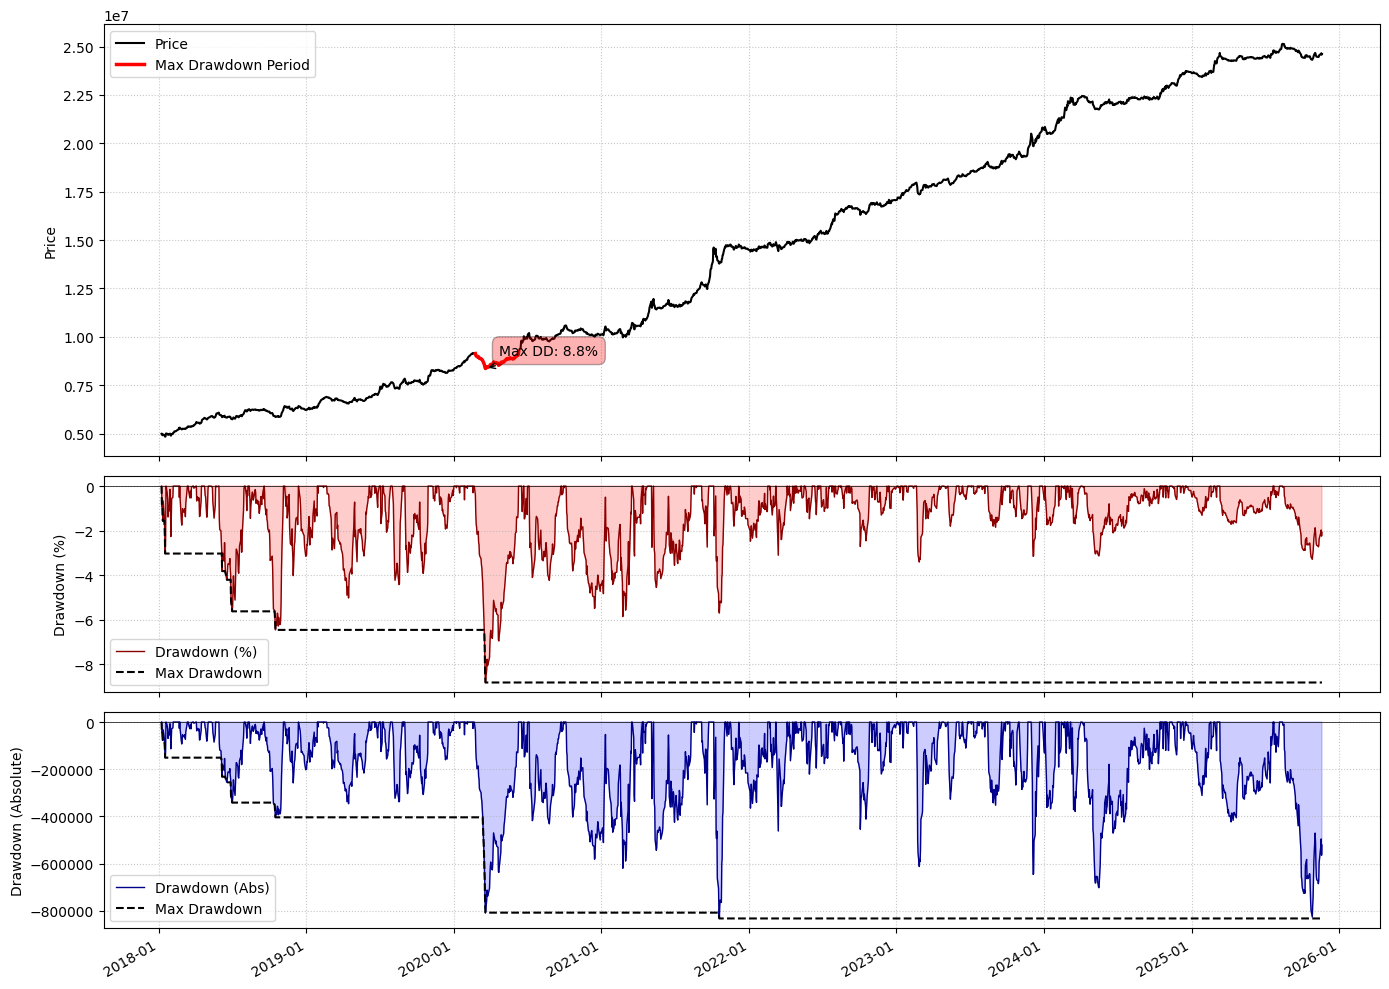

,Depth,Time to Trough (days),Recovery Time (days),Total Duration (days)
count,129.000000,129.000000,128.000000,128.000000
mean,-158510.149484,7.906977,10.164062,17.562500
std,184261.448014,17.718476,20.145837,31.445428
min,-832458.113333,0.000000,1.000000,1.000000
25%,-195082.655000,0.000000,1.000000,1.000000
50%,-90942.753667,1.000000,4.000000,6.000000
75%,-29638.345000,7.000000,9.000000,17.250000
max,-580.000000,140.000000,151.000000,190.000000


In [6]:
drawdown_table_pct, drawdown_table_abs= calculate_drawdown(df_plot['level']+5000000)
drawdown_table_abs[['Depth','Time to Trough (days)','Recovery Time (days)','Total Duration (days)']].describe()

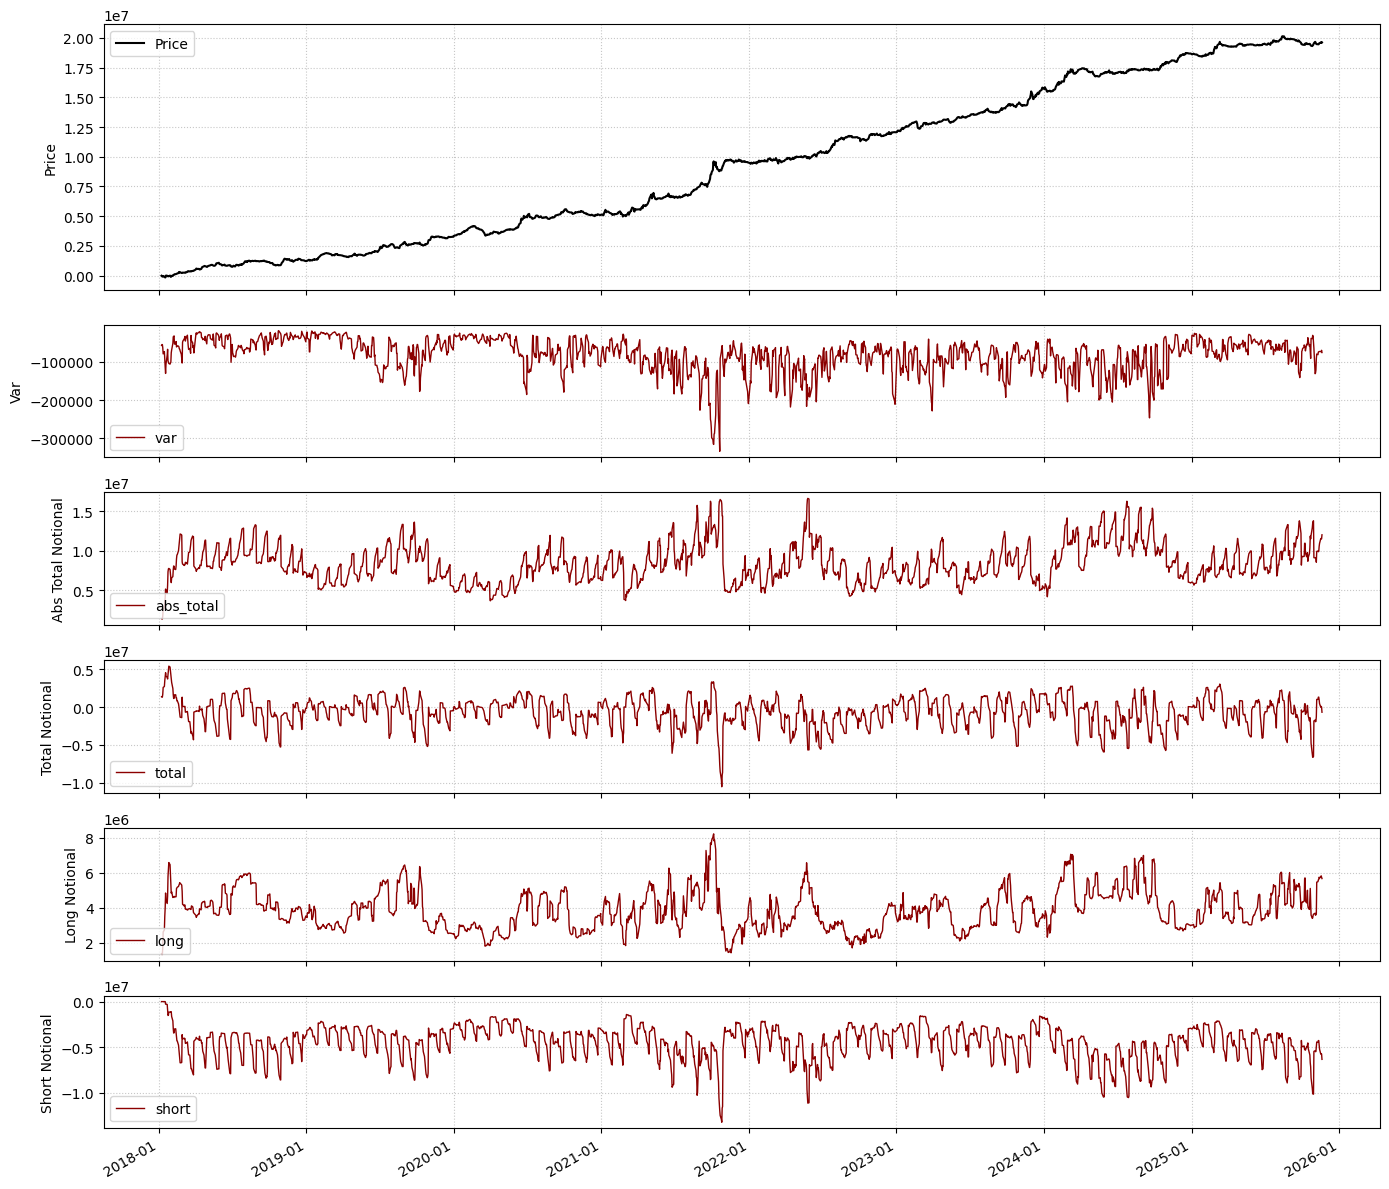

In [7]:
indices = {
    'p4tc_q': 1,
    'p4tc_m':1,
    'c5tc_m_kf':1,
    's10tc_m':1, 
    's10tc_q':1, 
    'c5tc_q_kf1':1,
    'c5tc_q_kf2':1,
    'c5tc_m_cot':1,
    'p4tc_m_cot':1,
    }
plot_var(df_plot['level'],indices)

,level,daily_returns,vol_annual,vol,ret,rolling_sr_smooth
count,1.487000e+03,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,2.093513e+07,0.000573,0.065722,5.997181,0.170790,2.850213
std,5.303416e+06,0.003829,0.003891,1.893143,0.062505,0.293485
min,1.236286e+07,-0.022045,0.058879,2.920658,0.049987,2.181258
25%,1.564293e+07,-0.001110,0.062136,4.704988,0.125251,2.669833
50%,2.092047e+07,0.000441,0.065894,5.541184,0.161080,2.849748
75%,2.613302e+07,0.002171,0.068675,7.461739,0.207921,3.095060
max,2.914130e+07,0.032668,0.073389,10.025743,0.348268,3.343889


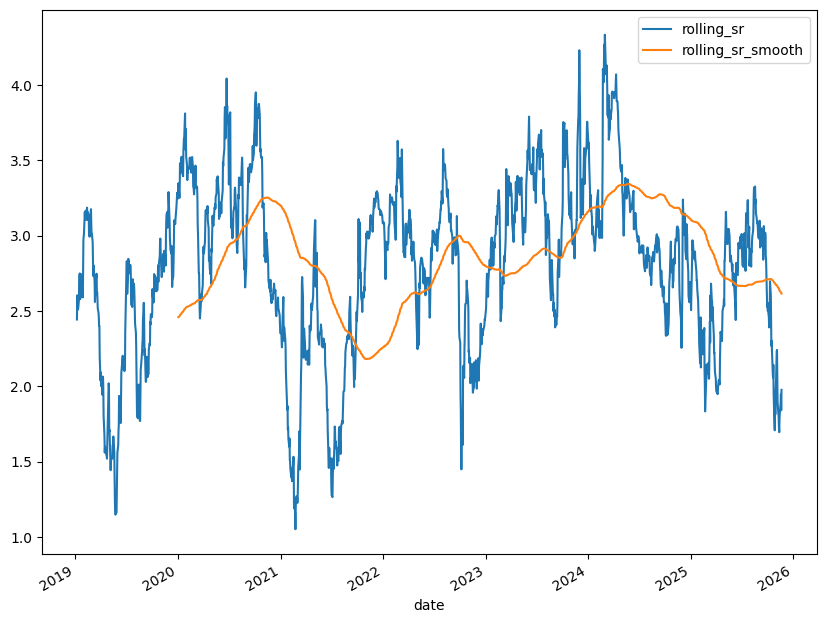

In [8]:
import numpy as np

sharpe = df_plot[['level']]+9000000
sharpe['daily_returns'] = (sharpe['level'] / sharpe['level'].shift(1)) - 1

sharpe['vol_annual'] = sharpe['daily_returns'].expanding(2).std() * np.sqrt(252)
sharpe['vol'] = sharpe[f'daily_returns'].rolling(window=252).std() * np.sqrt(252)
sharpe['ret'] = sharpe[f'level'].pct_change(252)
# sharpe = sharpe.loc['2024-09-18':]

sharpe['rolling_sr'] = (
    np.where(
        sharpe['vol'] != 0,
        sharpe['ret'] / sharpe['vol'],
        None
        )
        )
sharpe['vol']*=100
sharpe['rolling_sr_smooth'] = sharpe['rolling_sr'].rolling(252).mean()
sharpe[['rolling_sr','rolling_sr_smooth',]].plot( figsize=(10,8))
sharpe.dropna(inplace=True)
sharpe.describe()

In [9]:
year_end =df_plot['level'].resample('YE').last()
year_end

date
2018-12-31    1.221663e+06
2019-12-31    3.260165e+06
2020-12-31    5.117039e+06
2021-12-31    9.506815e+06
2022-12-31    1.205826e+07
2023-12-31    1.581818e+07
2024-12-31    1.866216e+07
2025-12-31    1.961987e+07
Freq: YE-DEC, Name: level, dtype: float64

In [10]:
year_end.diff()

date
2018-12-31             NaN
2019-12-31    2.038501e+06
2020-12-31    1.856874e+06
2021-12-31    4.389776e+06
2022-12-31    2.551441e+06
2023-12-31    3.759923e+06
2024-12-31    2.843984e+06
2025-12-31    9.577047e+05
Freq: YE-DEC, Name: level, dtype: float64